<a href="https://colab.research.google.com/github/niyaudinoor/HackathonNAAN/blob/main/2_Dissolved_Oxygen_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**[Predicting Future Water Quality with Machine Learning](https://www.sciencebuddies.org/science-fair-projects/project-ideas/ArtificialIntelligence_p019/artificial-intelligence/dissolved_oxygen)**

This notebook was developed by Science Buddies [www.sciencebuddies.org](https://www.sciencebuddies.org/) as part of a science project to allow students to explore and learn about artificial intelligence. For personal use, this notebook can be downloaded and modified with attribution. For all other uses, please see our [Terms and Conditions of Fair Use](https://www.sciencebuddies.org/about/terms-and-conditions-of-fair-use).  

**Troubleshooting tips**
*   Read the written instructions at Science Buddies and the text and comments on this page carefully.
*   If you make changes that break the code, you can download a fresh copy of this notebook and start over.

*   If you are using this notebook for a science project and need help, visit our [Ask an Expert](https://www.sciencebuddies.org/science-fair-projects/ask-an-expert-intro) forum for assistance.

## **How To Use This Notebook**

This notebook contains text fields, like this one, that give you information about the project and instructions.

# Importing Libraries

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
import graphviz
from IPython.display import display, HTML

# Scikit-learn: Model selection and evaluation
from sklearn.model_selection import train_test_split

# Scikit-learn: Regression models
from sklearn.ensemble import RandomForestRegressor

# Scikit-learn: Metrics for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

# Scikit-learn: Tree visualization
from sklearn.tree import export_graphviz
from sklearn import tree

# 3. Loading the Data into a Pandas DataFrame

Code Block 3A

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Code Block 3B

In [ ]:
# Define the path to the CSV file containing water quality data
csv_path = "/content/drive/MyDrive/6. Colab Notebooks/2. Water Quality/water_data.csv"

# Read the CSV file into a DataFrame using pandas
df = pd.read_csv(csv_path)

df.head()

,Date,Average Temperature C,Average pH,Average Specific Conductance μS/cm,Average Turbidity FNU,Average Dissolved Oxygen mg/l,Average Dissolved Oxygen +1 day mg/l,Average Dissolved Oxygen +1 week mg/l,Average Dissolved Oxygen +4 weeks mg/l
0,2024-05-01,19.8,8.3,1185.3,39.7,9.9,9.8,9.5,7.3
1,2024-05-02,20.0,8.3,1007.0,43.1,9.8,9.7,9.5,7.1
2,2024-05-03,20.9,8.3,864.5,41.4,9.7,8.7,9.4,6.9
3,2024-05-04,19.7,8.1,831.7,37.6,8.7,9.0,9.4,6.6
4,2024-05-05,18.7,8.1,825.8,33.8,9.0,9.4,9.3,6.4


# 4. Preprocessing the Dataset

## 4.1 Separating the Dataset into Inputs and Target

Code Block 4A

In [ ]:
# Drop the 'Date' column and the target columns ('Average DO (1 day)', 'Average DO (1 week)', 'Average DO (4 weeks)')
# from the DataFrame to create the input features DataFrame
inputs = df.drop(['Date', 'Average Dissolved Oxygen +1 day mg/l', 'Average Dissolved Oxygen +1 week mg/l', 'Average Dissolved Oxygen +4 weeks mg/l'], axis='columns')

# Select the target columns ('Average DO (1 day)', 'Average DO (1 week)', 'Average DO (4 weeks)')
# from the DataFrame to create the target DataFrame
target = df[[ 'Average Dissolved Oxygen +1 day mg/l', 'Average Dissolved Oxygen +1 week mg/l', 'Average Dissolved Oxygen +4 weeks mg/l']]

Code Block 4B

In [ ]:
# Convert the inputs DataFrame to a NumPy array with float data type
inputs = np.array(inputs, dtype=float)

# Convert the target DataFrame to a NumPy array with float data type
target = np.array(target, dtype=float)

## 4.2 Splitting the Training and Testing Data

Code Block 4C

In [ ]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (73, 5)
X_test shape: (19, 5)
y_train shape: (73, 3)
y_test shape: (19, 3)


# 5. Training the Model


Code Block 5A

In [ ]:
# Initialize a RandomForestRegressor model from the scikit-learn library
model = RandomForestRegressor()

Code Block 5B

In [ ]:
# Fitting the model to the training data (X_train) and corresponding labels (y_train)
model.fit(X_train, y_train)

RandomForestRegressor()

Code Block 5C

In [ ]:
# Using the trained model to make predictions on the test data (X_test)
y_pred = model.predict(X_test)

# Rounding to 1 decimal place
rounded_y_pred = np.round(y_pred, 2)

# Printing the predicted labels
print(rounded_y_pred)

[[7.3  6.7  4.99]
 [8.45 7.79 6.97]
 [6.41 5.42 5.54]
 [3.62 5.25 8.03]
 [9.43 9.44 6.97]
 [7.26 6.5  6.43]
 [7.41 6.95 5.09]
 [4.13 5.72 7.92]
 [9.25 8.92 7.23]
 [7.2  6.78 4.91]
 [4.35 7.89 8.01]
 [6.7  6.06 6.34]
 [6.94 6.96 3.88]
 [6.09 3.77 8.12]
 [9.21 8.62 7.05]
 [8.87 8.67 7.  ]
 [8.89 7.58 7.36]
 [7.2  6.56 6.26]
 [7.38 6.69 5.9 ]]


In [ ]:
# Using the trained model to make predictions on the test data (X_test)
y_pred = model.predict(X_test)

# Rounding to 1 decimal place
rounded_y_pred = np.round(y_pred, 2)

# Printing the predicted labels
print(rounded_y_pred)

[[7.3  6.7  4.99]
 [8.45 7.79 6.97]
 [6.41 5.42 5.54]
 [3.62 5.25 8.03]
 [9.43 9.44 6.97]
 [7.26 6.5  6.43]
 [7.41 6.95 5.09]
 [4.13 5.72 7.92]
 [9.25 8.92 7.23]
 [7.2  6.78 4.91]
 [4.35 7.89 8.01]
 [6.7  6.06 6.34]
 [6.94 6.96 3.88]
 [6.09 3.77 8.12]
 [9.21 8.62 7.05]
 [8.87 8.67 7.  ]
 [8.89 7.58 7.36]
 [7.2  6.56 6.26]
 [7.38 6.69 5.9 ]]


Code Block 5D

In [ ]:
# Rounding to 1 decimal place
rounded_y_test = np.round(y_test, 2)

print(rounded_y_test)

[[7.3 7.6 3.6]
 [7.5 7.1 7.5]
 [6.5 6.2 3.6]
 [5.8 4.  8.4]
 [9.8 9.5 7.3]
 [7.2 6.5 6.5]
 [7.7 7.6 4.8]
 [3.6 5.8 7.4]
 [9.3 9.2 8. ]
 [7.5 7.1 3.4]
 [4.4 8.7 8. ]
 [6.6 7.  6.2]
 [8.7 7.7 7.9]
 [6.2 3.7 8.7]
 [9.6 8.8 7.7]
 [9.4 9.3 6.4]
 [8.8 7.4 7.6]
 [7.1 6.5 6.5]
 [7.5 6.5 6.2]]


# 6. Evaluating the Model

Code Block 6A

In [ ]:
# Calculate Mean Absolute Error
mae = np.mean(np.abs(y_test - y_pred))
mae_1day = np.mean(np.abs(y_test[0] - y_pred[0]))
mae_7days = np.mean(np.abs(y_test[1] - y_pred[1]))
mae_30days = np.mean(np.abs(y_test[2] - y_pred[2]))

print("Overall Mean Absolute Error:", mae)
print("1 day Mean Absolute Error:", mae_1day)
print("1 Week Mean Absolute Error:", mae_7days)
print("4 weeks Mean Absolute Error:", mae_30days)

Overall Mean Absolute Error: 0.5505614035087719
1 day Mean Absolute Error: 0.7653333333333344
1 Week Mean Absolute Error: 0.7240000000000011
4 weeks Mean Absolute Error: 0.9366666666666666


Code Block 6B

In [ ]:
# Define a function to calculate the Mean Absolute Percentage Error (MAPE)
# between the true values (y_true) and the predicted values (y_pred)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
mape_1day = mean_absolute_percentage_error(y_test[0], y_pred[0])
mape_7days = mean_absolute_percentage_error(y_test[1], y_pred[1])
mape_30days = mean_absolute_percentage_error(y_test[2], y_pred[2])

print("Overall Mean Absolute Percentage Error:", mape)
print("1 day Mean Absolute Percentage Error:", mape_1day)
print("1 Week Mean Absolute Percentage Error:", mape_7days)
print("4 Weeks Mean Absolute Percentage Error:", mape_30days)

Overall Mean Absolute Percentage Error: 9.063531354263288
1 day Mean Absolute Percentage Error: 16.84946861064383
1 Week Mean Absolute Percentage Error: 9.82685446009391
4 Weeks Mean Absolute Percentage Error: 22.61804981159818


# 7. Visualize the Data

Code Block 7A

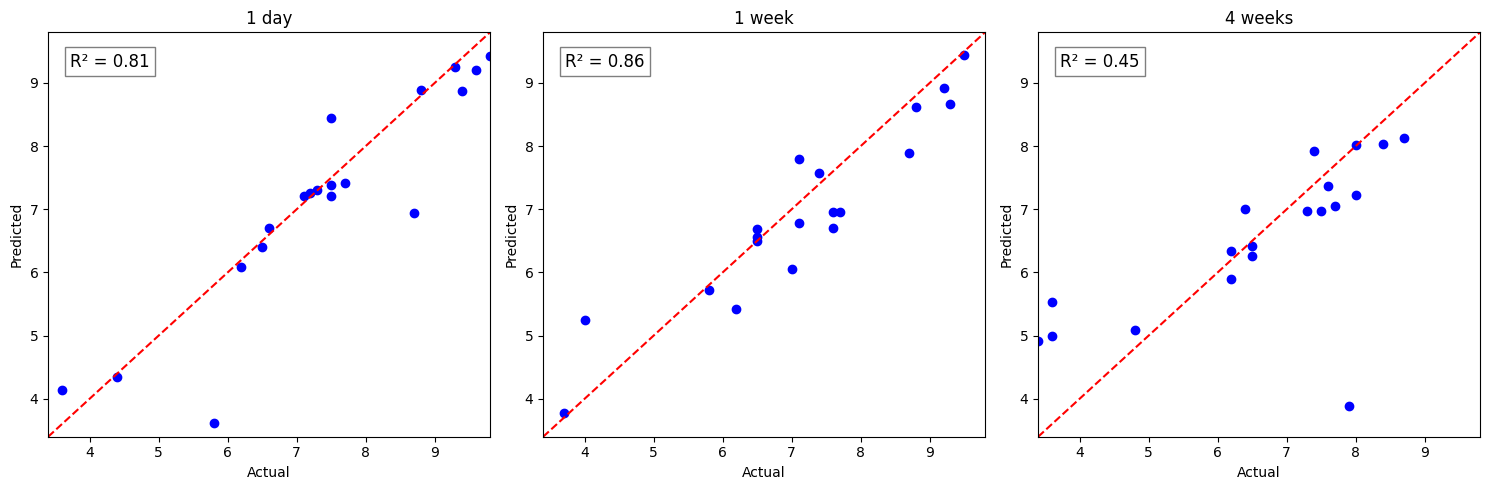

In [ ]:
# Number of features
n_features = y_test.shape[1]

# Create subplots
fig, axes = plt.subplots(1, n_features, figsize=(15, 5))

# Titles for each subplot
titles = ['1 day', '1 week', '4 weeks']

# Determine common axis limits
x_min = min(y_test.min(), y_pred.min())
x_max = max(y_test.max(), y_pred.max())

for i in range(n_features):
    axes[i].scatter(y_test[:, i], y_pred[:, i], c='blue')
    axes[i].plot([x_min, x_max], [x_min, x_max], 'r--')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(x_min, x_max)
    axes[i].set_xlabel('Actual')
    axes[i].set_ylabel('Predicted')
    axes[i].set_title(titles[i])

    # Calculate and annotate R² value
    r2 = r2_score(y_test[:, i], y_pred[:, i])
    axes[i].text(0.05, 0.95, f'R² = {r2:.2f}', transform=axes[i].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

Code Block 7B

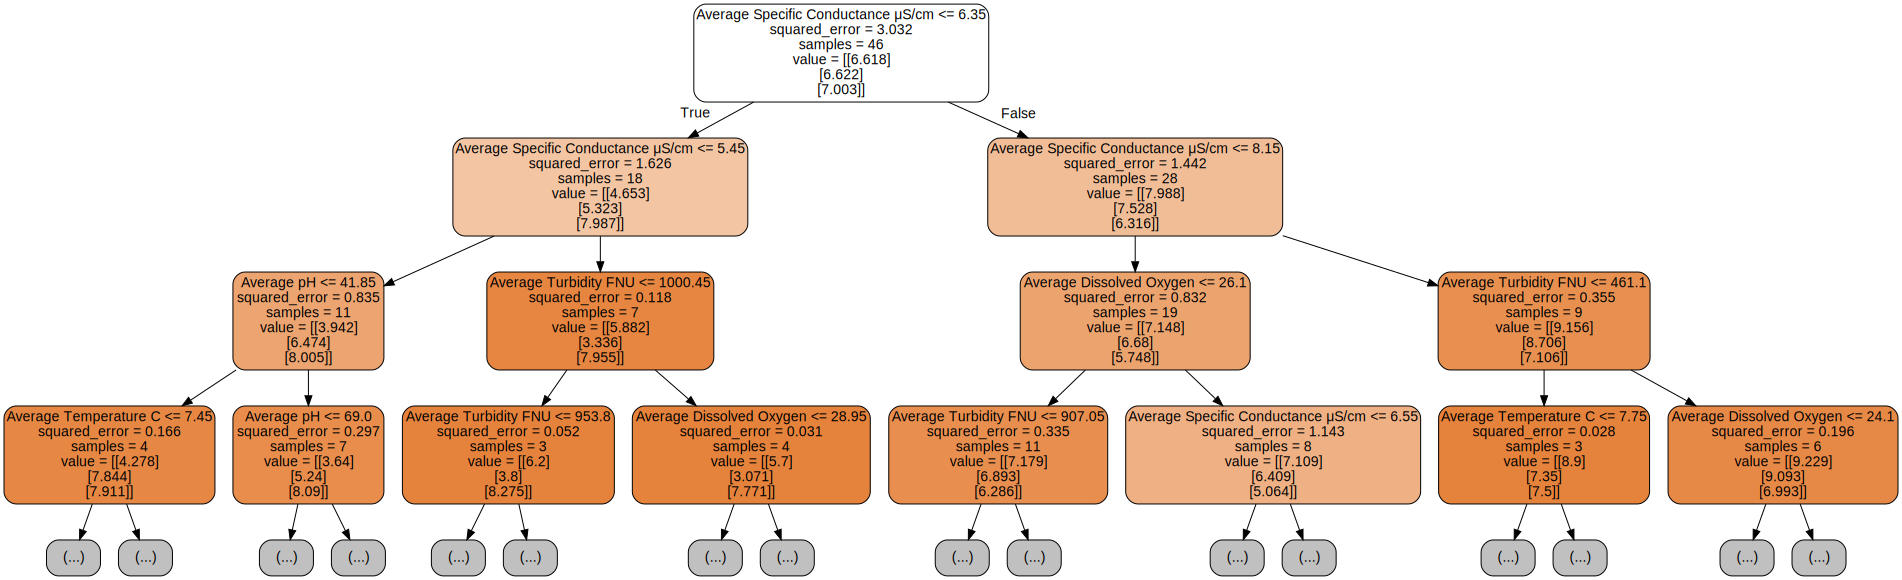

In [ ]:
# TODO: Change this value to view the other decision trees
tree_number = 1

# TODO: Change this value to change the depth of the decision tree
max_depth = 3

tree = model.estimators_[tree_number]

feature_names = ['Average Dissolved Oxygen', 'Average Temperature C',	'Average Turbidity FNU', 'Average pH', 'Average Specific Conductance μS/cm']

dot_data = export_graphviz(tree, feature_names=feature_names, filled=True, rounded=True, max_depth=max_depth)

graph = graphviz.Source(dot_data)
graph.render("water_tree")
graph

Code Block 7C

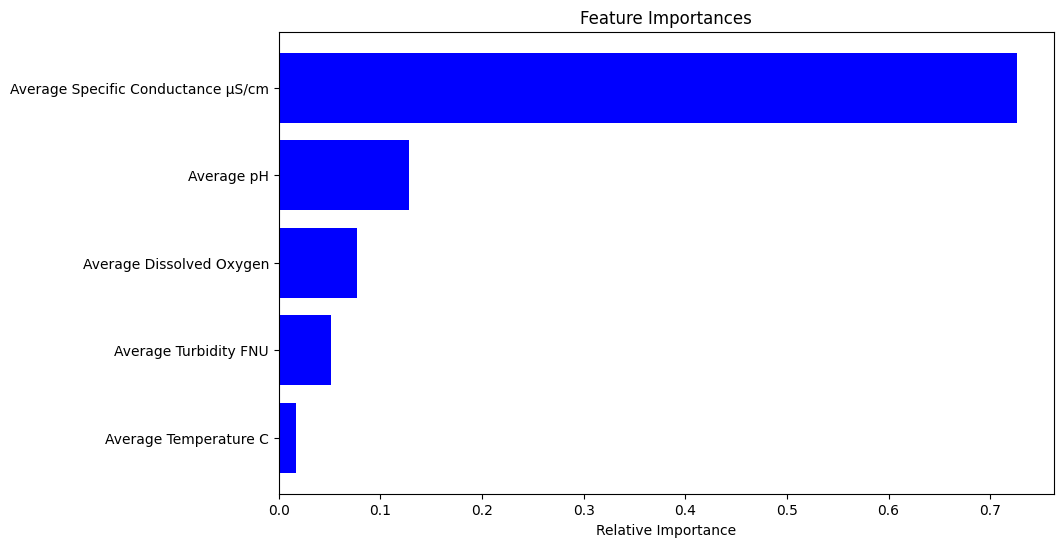

In [ ]:
# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()